(heat_equation:solution)=
### Heat Equation

Integrate the heat equation for several days using a time step of 1 hour and a heat conductivity of  𝜈_𝑔 = 1.2e-6 [m2 s-1 ]. Plot the result. Once the code works, change the integration time. What happens if you integrate over a very long time?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


def heat_equation(bc_surface, bc_bottom, depth, Nz, integration, dt):
    ''' Solves the heat equation
    bc_surface :: boundary condition at the surface
    bc_bottom  :: boundary condition at the bottom
    depth      :: depth of the domain [m]
    Nz         :: number of grid points
    integration:: number of iterations
    dt         :: time step [s]
    '''

    # Definitions
    dz    = depth/Nz # Distance between grid points
    alpha = 1.2e-6   # Conductivity

    # Initialize temperature and depth field
    T = np.zeros(Nz)

    T[0] = bc_surface    # Set pen-ultima array to bc value (because the last grid cell
                         # is required to calculate the second order derivative)
    T[Nz-1] = bc_bottom  # Set the first elemnt to the bottom value

    # Create the solution vector for new timestep (we need to store the temperature values
    # at the old time step)    
    Tnew = T.copy()

    # Loop over all times
    for t in range(integration):
        # Loop over all grid points
        for z in range(1,Nz-1):
            Tnew[z] = T[z] + ((T[z+1] + T[z-1] - 2*T[z])/dz**2) * dt * alpha

        # Update old temperature array
        T = Tnew.copy()

        # Neumann boundary condition
        T[Nz-1] = T[Nz-2] 

    # return vertical temperature profile and grid spacing
    return T, dz





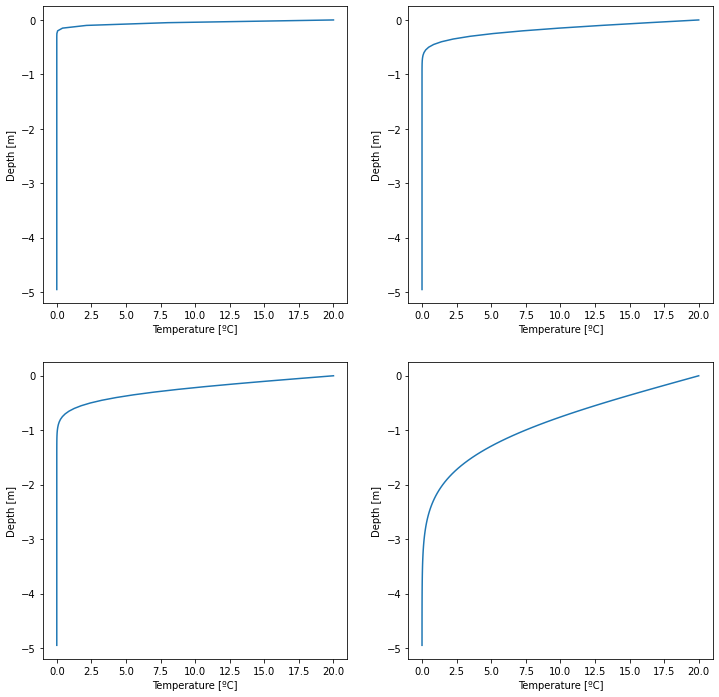

In [2]:
# Plot results
fig, ax = plt.subplots(2,2,figsize=(12,12))

Nz = 100
T, dz = heat_equation(20, 0, 5, Nz, 24, 60)
ax[0,0].plot(T,-dz*np.arange(Nz));
ax[0,0].set_xlabel('Temperature [ºC]')
ax[0,0].set_ylabel('Depth [m]')

T, dz = heat_equation(20, 0, 5, Nz, 24*14, 60)
ax[0,1].plot(T,-dz*np.arange(Nz));
ax[0,1].set_xlabel('Temperature [ºC]')
ax[0,1].set_ylabel('Depth [m]')

T, dz = heat_equation(20, 0, 5, Nz, 24*30, 60)
ax[1,0].plot(T,-dz*np.arange(Nz));
ax[1,0].set_xlabel('Temperature [ºC]')
ax[1,0].set_ylabel('Depth [m]')

T, dz = heat_equation(20, 0, 5, Nz, 24*365, 60)
ax[1,1].plot(T,-dz*np.arange(Nz));
ax[1,1].set_xlabel('Temperature [ºC]')
ax[1,1].set_ylabel('Depth [m]')

plt.show()

### Heat equation with index arrays

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math


def heat_equation_indices(bc_surface, bc_bottom, depth, Nz, integration, dt):
    ''' Solves the heat equation using index arrays
    bc_surface :: boundary condition at the surface
    bc_bottom  :: boundary condition at the bottom
    depth      :: depth of the domain [m]
    Nz         :: number of grid points
    integration:: number of iterations
    dt         :: time step [s]
    '''

    # Definitions
    dz    = depth/Nz # Distance between grid points
    alpha = 1.2e-6   # Conductivity

    # Define index arrays 
    k  = np.arange(1,Nz-1)  # all indices at location i
    kr  = np.arange(2,Nz)   # all indices at location i+1
    kl  = np.arange(0,Nz-2) # all indices at location i-1


    # Initialize temperature and depth field
    T = np.zeros(Nz)

    T[0] = bc_surface     # Set pen-ultima array to bc value (because the last grid cell
                          # is required to calculate the second order derivative)
    T[Nz-1] = bc_bottom   # Set the first elemnt to the bottom value

    # Create the solution vector for new timestep (we need to store the temperature values
    # at the old time step)    
    Tnew = T.copy()

    # Loop over all times
    for t in range(integration):
        # Update temperature
        Tnew[k] = T[k] + ((T[kr] + T[kl] - 2*T[k])/dz**2) * dt * alpha

        # Update old temperature array
        T = Tnew.copy()

        # Neumann boundary condition
        T[Nz-1] = T[Nz-2] 

    # return vertical temperature profile and grid spacing
    return T, dz






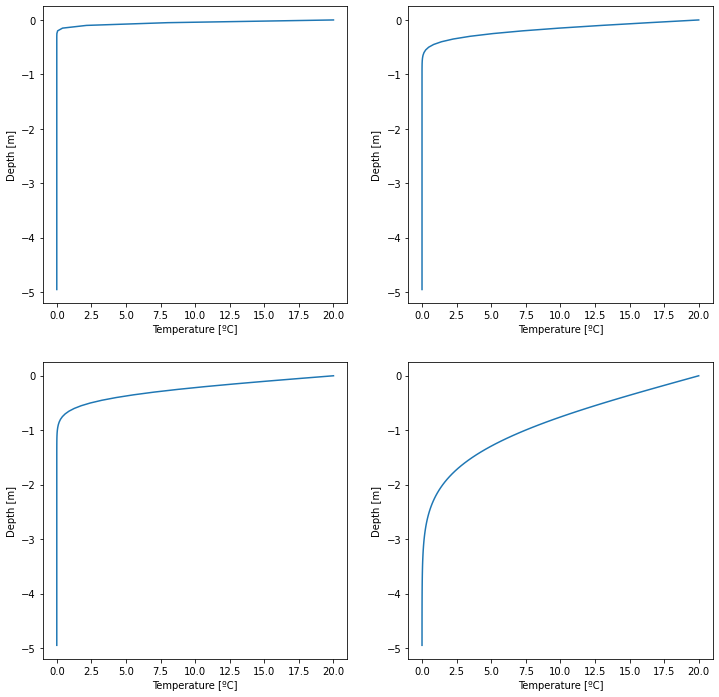

In [4]:

# Plot results
fig, ax = plt.subplots(2,2,figsize=(12,12))

Nz = 100
T, dz = heat_equation_indices(20, 0, 5, Nz, 24, 60)
ax[0,0].plot(T,-dz*np.arange(Nz));
ax[0,0].set_xlabel('Temperature [ºC]')
ax[0,0].set_ylabel('Depth [m]')

T, dz = heat_equation_indices(20, 0, 5, Nz, 24*14, 60)
ax[0,1].plot(T,-dz*np.arange(Nz));
ax[0,1].set_xlabel('Temperature [ºC]')
ax[0,1].set_ylabel('Depth [m]')

T, dz = heat_equation_indices(20, 0, 5, Nz, 24*30, 60)
ax[1,0].plot(T,-dz*np.arange(Nz));
ax[1,0].set_xlabel('Temperature [ºC]')
ax[1,0].set_ylabel('Depth [m]')

T, dz = heat_equation_indices(20, 0, 5, Nz, 24*365, 60)
ax[1,1].plot(T,-dz*np.arange(Nz));
ax[1,1].set_xlabel('Temperature [ºC]')
ax[1,1].set_ylabel('Depth [m]')

plt.show()

### Time-dependent heat equation

Using the previous code, solve the Heat Equation using a temporal varying surface boundary condition. Use the following discretization: I = [0; 20 m], N = 40 grid points, 𝜈_𝑔 = 1.2e-6 [m2 s-1 ], and a daily time step. Integrate the equation for several years, e.g. 5 years. Plot the result as a contour plot. Also plot temperature time series in several depths. Discuss the plot!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math


def heat_equation_time(depth, Nz, years):
    """ This is an example of an time-dependent heat equation using a 
    sinus wave temperature signal at the surface. The heat equation is solved for a 
    pre-defined number of years over the domain depth using Nz grid points."""

    # Definitions and assignments
    integration = 365*years    # Integration time in days
    dz  = depth/Nz             # Distance between grid points
    dt  = 86400                # Time step in seconds (for each day)
    K   = 1.2e-6               # Conductivity
 
    # Define index arrays 
    k  = np.arange(1,Nz-1)  # all indices at location i
    kr  = np.arange(2,Nz)   # all indices at location i+1
    kl  = np.arange(0,Nz-2) # all indices at location i-1

    # Initial temperature field
    T = np.zeros(Nz)

    # Create array for new temperature values
    Tnew = T

    # 2D-Array containing the vertical profiles for all time steps (depth, time)
    T_all = np.zeros((Nz,int(integration)))

    
    # Time loop
    for t in range(integration):

        # Set top BC - Dirlichet condition
        T[0] = 10 - 20 * np.sin((2*math.pi*t)/365)

        # Set lower BC - Neumann condition
        T[Nz-1] = T[Nz-2]
        
        # Update temperature using indices arrays
        Tnew[k] = T[k] + ((T[kr] + T[kl] - 2*T[k])/dz**2) * dt * K
        
        # Copy the new temperature als old timestep values (used for the 
        # next time loop step)
        T = Tnew

        # Write result into the final array
        T_all[:,t] = T


    # return temperature array, grid spacing, and number of integration steps
    return T_all, dz, integration




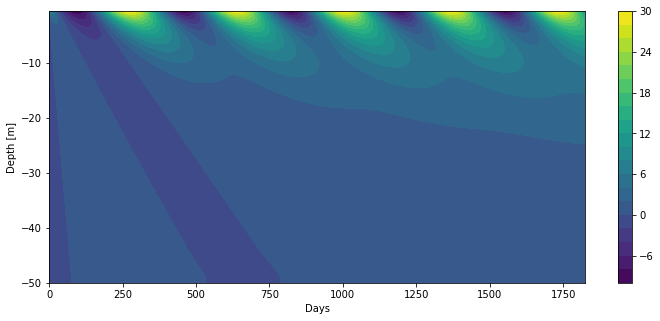

In [12]:
# Solve the heat equation
T_all, dz, integration = heat_equation_time(50, 80, 5)

# Create 2D mesh grid
# First create the y-axis values
y = np.arange(-50,0,dz)
# then the x-axis values
x = np.arange(integration)
# use the arrays to create a 2D-mesh
X, Y = np.meshgrid(x, y)

# Plot results on the mesh
plt.figure(figsize=(12,5))
plt.contourf(X,Y,T_all[::-1],25,origin='lower');

# Axis labels
plt.xlabel('Days')
plt.ylabel('Depth [m]')
plt.colorbar();

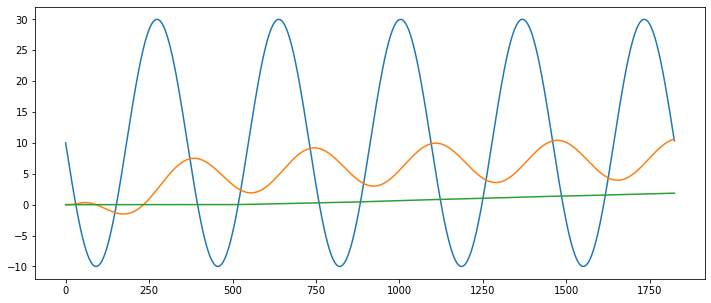

In [13]:
# Plot temperature in several depths
plt.figure(figsize=(12,5))
plt.plot(T_all[0,:]);
plt.plot(T_all[10,:]);
plt.plot(T_all[40,:]);